<a href="https://colab.research.google.com/github/bjkc/Data-visualization/blob/main/recreatingmasterproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bijay raj kc

CPSMA 4313

RECREATING THE MASTER PROJECT

For this recreating project i have choosen the video games.My topic will be the most valuable video game companies in the world and its revenue in billion.I Choose the video games topic for this project because i have been playing video games since i was a kid and still spend some times playing it now.

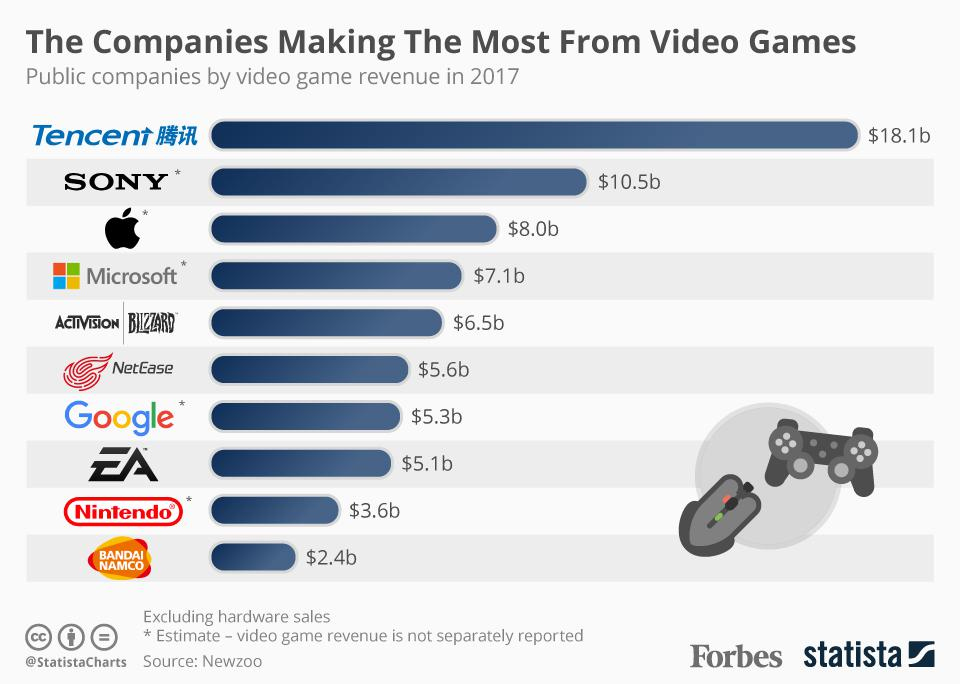

I have found the above data on forbes which is showing the revenue of the video games companies.And below is the another graph which looks more informative than above

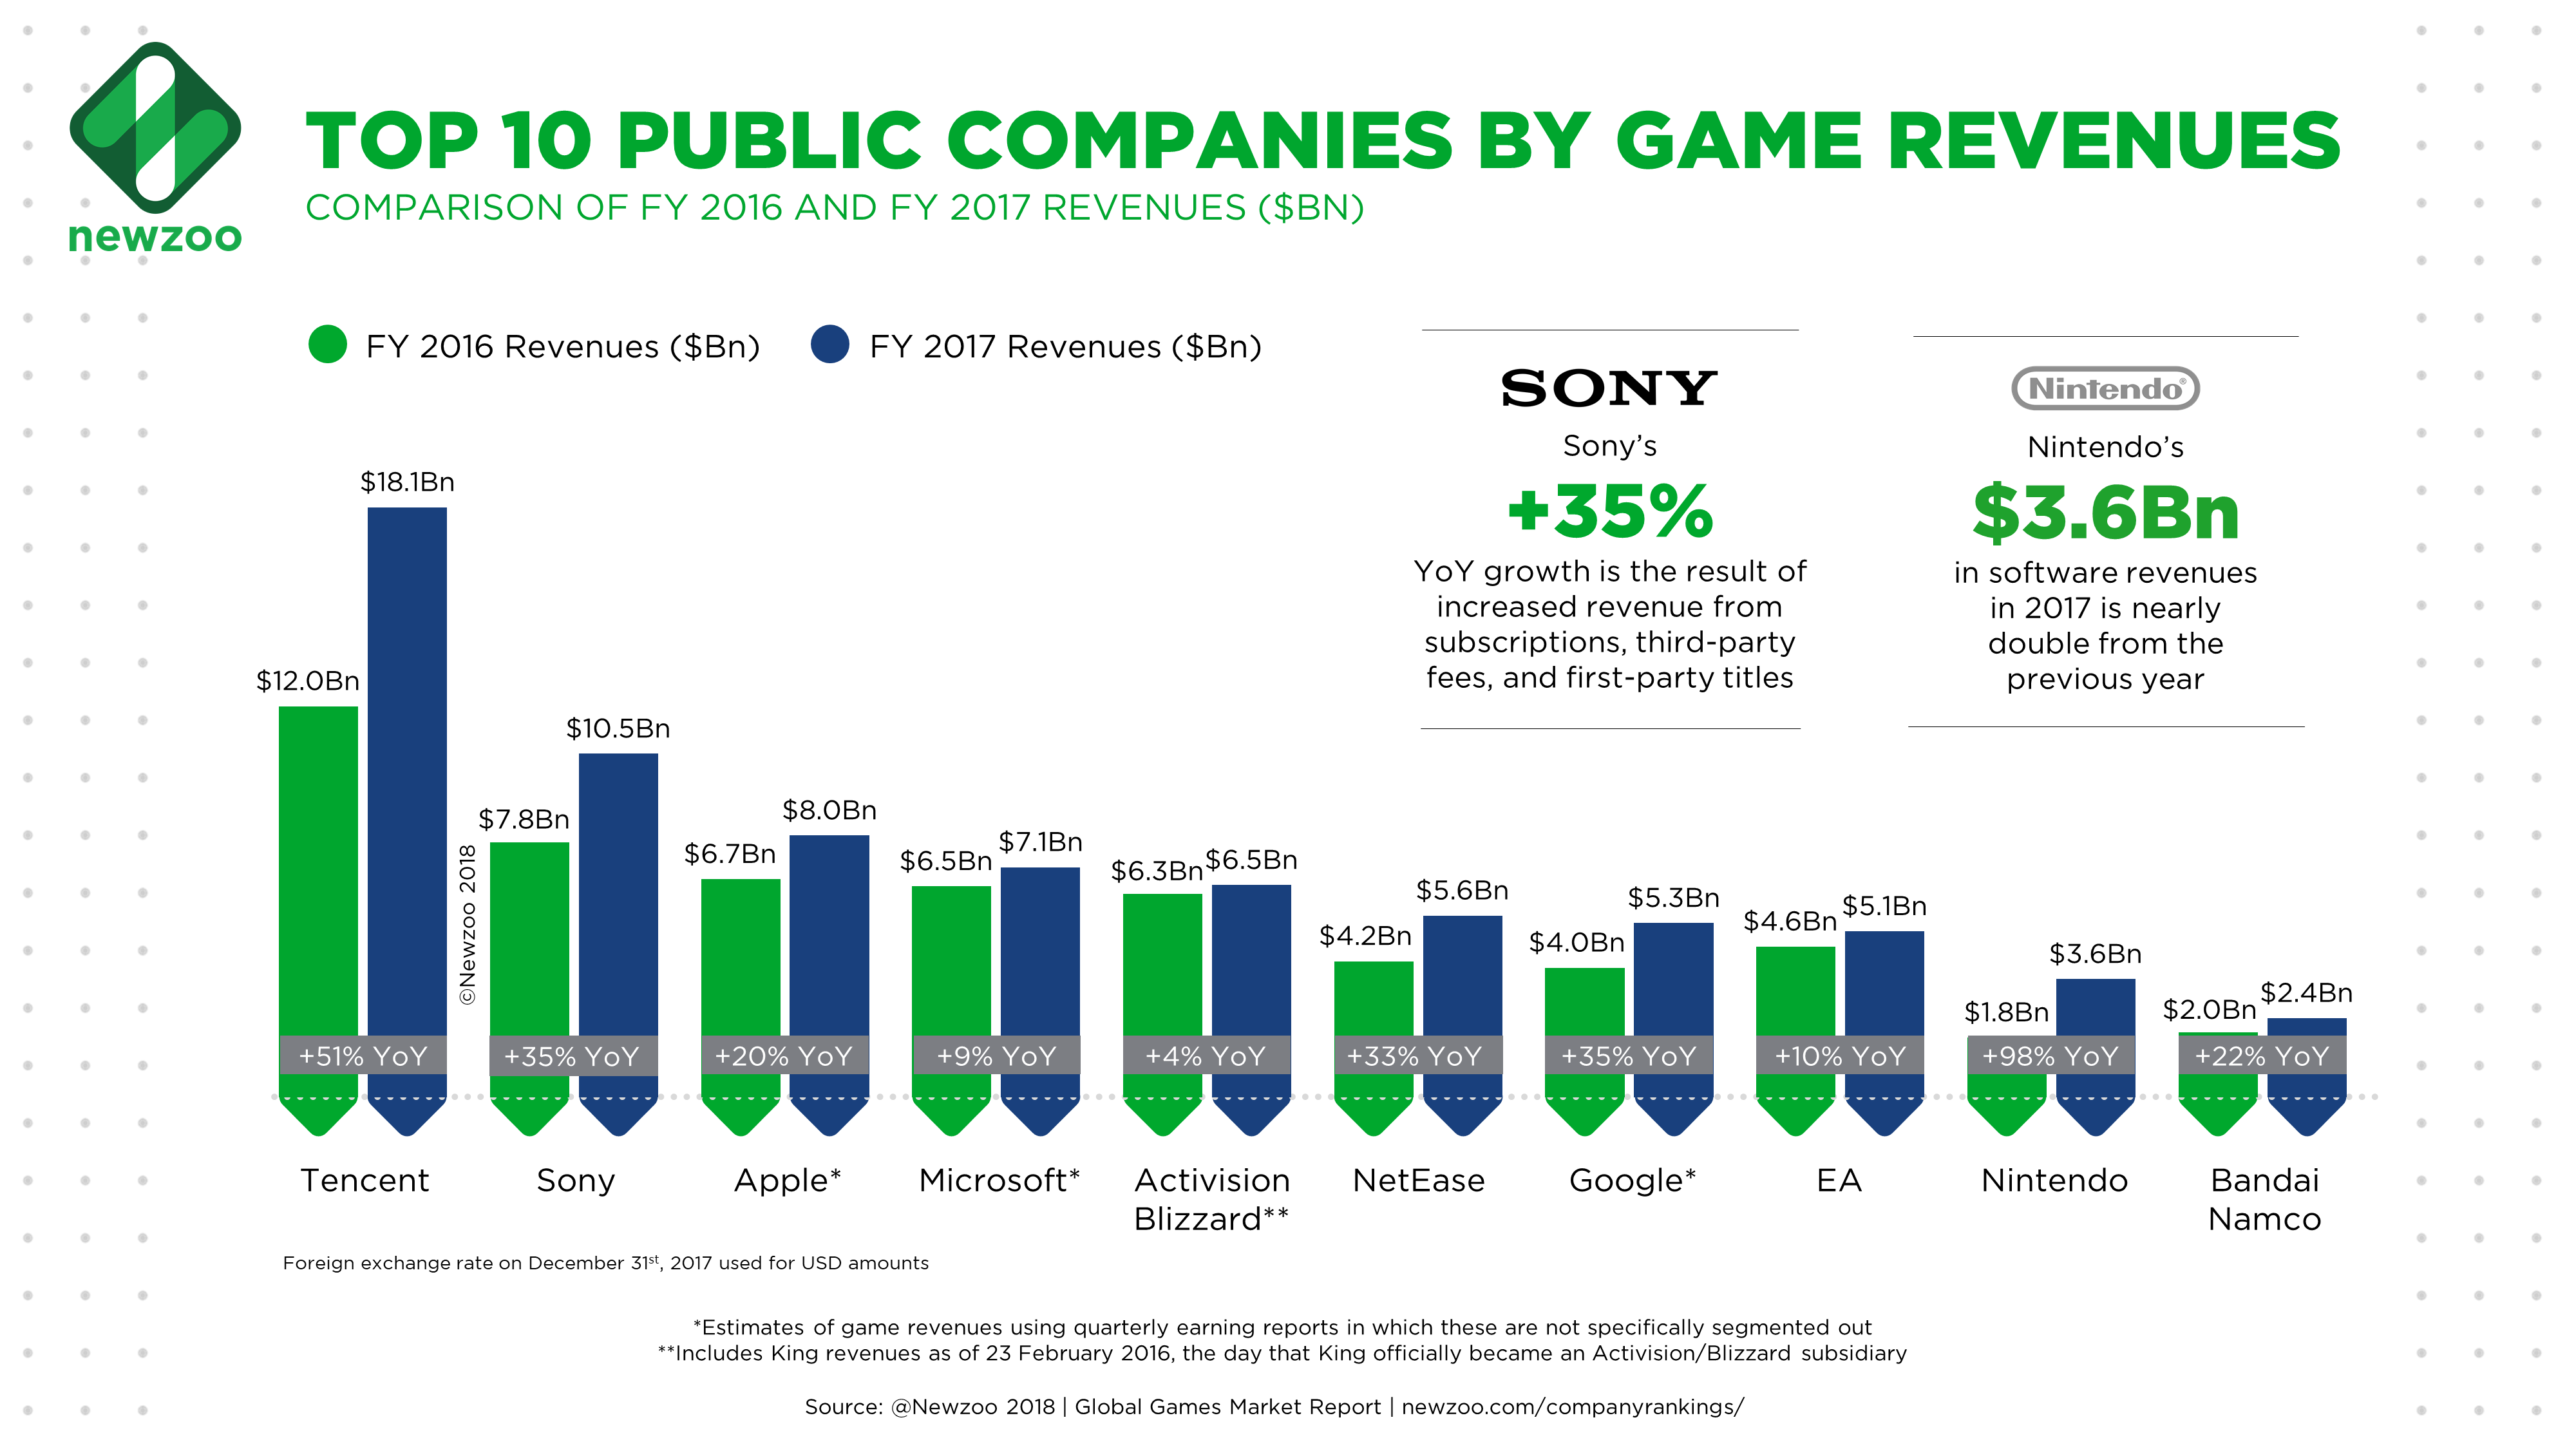

recreating will be hard but lets do the work by putting the code that i have been using the whole semister in many quizes and exam has been using this code

In [2]:
import numpy as np #a matrix like package for handling data
import pandas as pa #a R like package for handling data
from scipy import stats #a way to just get a piece of a large package
import matplotlib.pyplot as plt #a way to generate plots, histograms, bar charts, and other types of charts 
import seaborn as sns #it is based on matplotlib
import requests #HTTP library
import pandas as pd # used to manipulate data and analyze it
from bs4 import BeautifulSoup #Used for a web scraping purposes to pull the data out of HTML and XML files
import re #Used for regular expression in Python.

In [3]:
r = requests.get('https://en.wikipedia.org/wiki/Video_game_publisher')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
len(html_soup.find_all('table'))

4

In [4]:
html_soup.title

<title>Video game publisher - Wikipedia</title>

In [5]:
tables = html_soup.find_all('table')

df = pa.read_html(str(tables))[2]
df

,FY 2020-2021,Name of Publisher,HQ Country,Revenue in $bn
0,1,Sony Interactive Entertainment,"Japan, United States",18.1900
1,2,Tencent Games,China,16.2240
2,3,Nintendo,Japan,12.0100
3,4,Microsoft,United States,10.2600
4,5,NetEase,China,6.6680
5,6,Activision Blizzard,United States,6.3880
6,7,Electronic Arts,United States,5.5370
7,8,Take-Two Interactive,United States,3.0890
8,9,Bandai Namco,Japan,3.0180
9,10,Square Enix,Japan,2.3860


Lets see if i have some null values so i can clean them .This is what i will be doing now

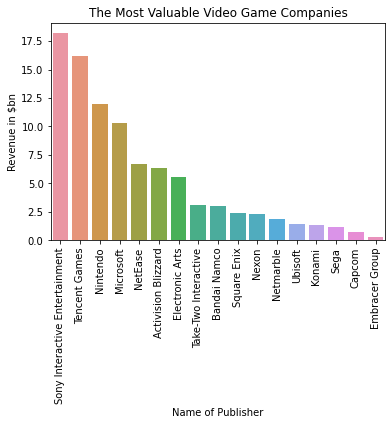

In [6]:
ax = sns.barplot(data = df, x= 'Name of Publisher', y= "Revenue in $bn", hue_order= None )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('The Most Valuable Video Game Companies')
plt.show()

i tried to recreate it and offcourse i will do some more with data cleaning and recreate the best one for the project

In [7]:
df.isnull()

,FY 2020-2021,Name of Publisher,HQ Country,Revenue in $bn
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


Yes i need to do data cleaning as much as i can so it looks great for data visualization and i will be continuing creating the best one and i will recreate the first picture

so okay lets clean the column

In [8]:
df.columns


Index(['FY 2020-2021', 'Name of Publisher', 'HQ Country', 'Revenue in $bn'], dtype='object')

now ,from here  we can see there are [], (), %. Let's clean (%) part from the column and any other special character between them.

In [11]:
cols = df.columns.map(lambda s: re.sub(r"[(.())./d]","",s))
cols

Index(['FY 2020-2021', 'Name of Publisher', 'HQ Country', 'Revenue in $bn'], dtype='object')

In [12]:
df.columns = df.columns.map(lambda s: re.sub(r"[.\d[(.$M%\d)\]]","",s))


i will again make sure the data is cleaned properly.

In [14]:
df.columns

Index(['FY -', 'Name of Publisher', 'HQ Country', 'Revenue in bn'], dtype='object')

i still need to clean the space

In [15]:
cols1 = df.columns.map(lambda s: re.sub(r" ","",s))
cols1

Index(['FY-', 'NameofPublisher', 'HQCountry', 'Revenueinbn'], dtype='object')

In [16]:
df.columns = df.columns.map(lambda s: re.sub(r" ","",s))


In [17]:
df.columns

Index(['FY-', 'NameofPublisher', 'HQCountry', 'Revenueinbn'], dtype='object')

In [20]:
Team = df.NameofPublisher.map (lambda s: s.upper())

In [22]:
df.NameofPublisher =df.NameofPublisher.map(lambda s: s.upper())

now i will apply this changes to my old table and do visualization

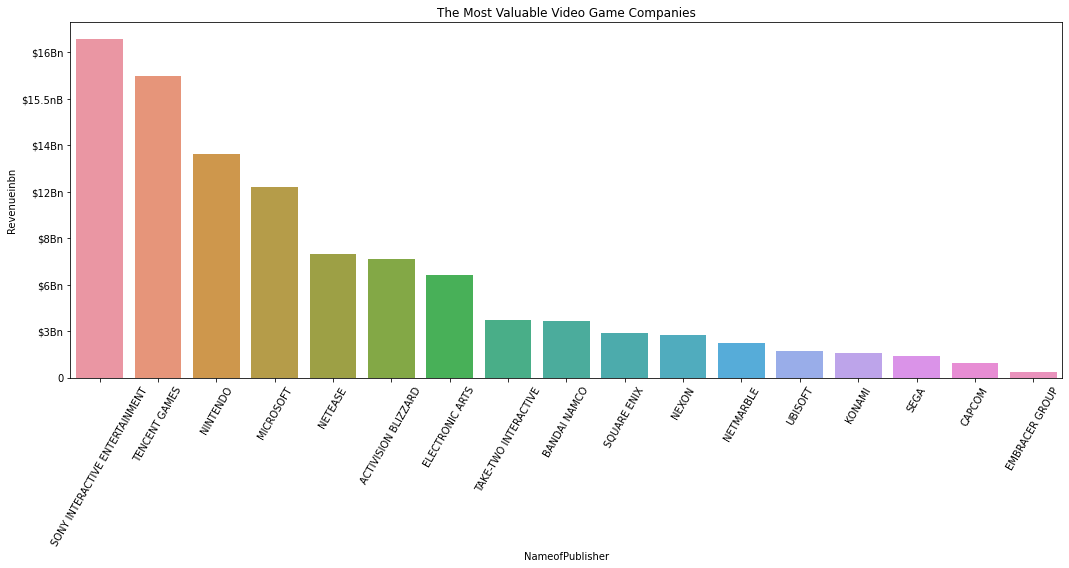

In [26]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
ax = sns.barplot(data = df, x = 'NameofPublisher', y= "Revenueinbn", ci= None)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ylabels = ['0','$3Bn' , '$6Bn', '$8Bn', '$12Bn', '$14Bn', '$15.5nB', '$16Bn', '$18Bn']
ax.set_title('The Most Valuable Video Game Companies')
ax.set_yticklabels(ylabels)
plt.show()

lets see the above graph in different colors

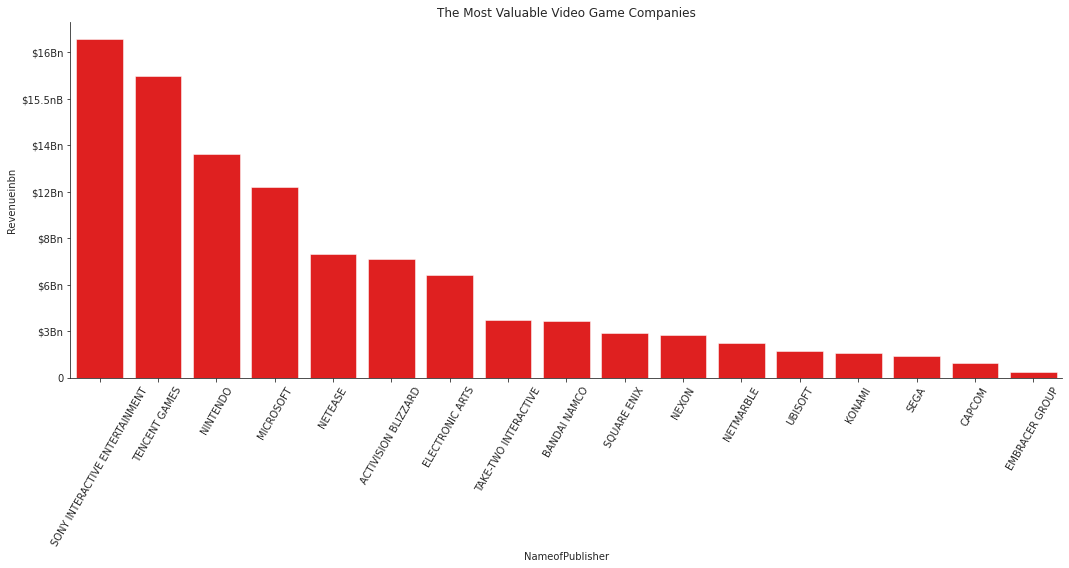

In [27]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x = 'NameofPublisher', y= "Revenueinbn", color= 'Red', ci= None, linewidth= 0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ylabels = ['0','$3Bn' , '$6Bn', '$8Bn', '$12Bn', '$14Bn', '$15.5nB', '$16Bn', '$18Bn']
ax.set_yticklabels(ylabels)
ax.set_title('The Most Valuable Video Game Companies')
sns.despine()
plt.show()

by the way i like those bright colors